# **Part 1: Regression Task (California Housing)**

**Task 1: Load and Split Dataset**

In [ ]:
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load dataset
X, y = fetch_california_housing(return_X_y=True,as_frame=True)

# Split dataset into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


HTTPError: HTTP Error 403: Forbidden

# **Task 2: Complete all the Task**

• Regression Task (California Housing):

– Step 1: Baseline Model (No Regularization) Build a Linear Regression model without
any regularization.

∗ Train the model on the training set.

∗ Observe the coefficients of the model.

∗ Compute the Mean Squared Error (MSE) on both training and test sets.

∗ This step helps to understand how a simple linear model behaves on the dataset and serves as
a baseline for comparison.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize linear regression model (no regularization)
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Observe coefficients
print("Coefficients of Linear Regression:\n", lr.coef_)

# Predict on training and test sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Compute MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Linear Regression MSE (Train):", mse_train)
print("Linear Regression MSE (Test):", mse_test)


NameError: name 'X_train' is not defined

Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for Ridge and Lasso regression models.

∗ Define a grid of alpha values (regularization strength).

∗ Run cross-validation on the training set to find the optimal alpha.

∗ Evaluate the model performance on the test set using MSE.

∗ This step demonstrates the importance of selecting appropriate hyperparameters to improve
generalization.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define alpha grid
alpha_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression GridSearch
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid=alpha_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print("Best alpha for Ridge:", ridge_cv.best_params_['alpha'])

# Lasso Regression GridSearch
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, param_grid=alpha_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
print("Best alpha for Lasso:", lasso_cv.best_params_['alpha'])

# Evaluate on test set
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train, y_train)
ridge_pred = ridge_best.predict(X_test)

lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=10000)
lasso_best.fit(X_train, y_train)
lasso_pred = lasso_best.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Ridge MSE (Test):", mean_squared_error(y_test, ridge_pred))
print("Lasso MSE (Test):", mean_squared_error(y_test, lasso_pred))


Step 3: Regularization Experiments (L1 vs L2) Train L1 (Lasso) and L2 (Ridge) regres-
sion models using the optimal hyperparameters.

∗ Compare the coefficients learned by both models. Notice that L1 tends to produce sparse
coefficients (some set to zero), while L2 shrinks coefficients without zeroing them.

∗ Evaluate and compare the MSE on training and test sets.

∗ Discuss the effect of regularization on the bias-variance tradeoff:
· How L1/L2 reduces variance and prevents overfitting.
· How excessive regularization may increase bias and underfit the data.

∗ Visualize the effect by plotting coefficients or training/test error versus alpha values (optional
but recommended).

In [ ]:
# Coefficients comparison
print("Linear Regression Coefficients:\n", lr.coef_)
print("Ridge Coefficients:\n", ridge_best.coef_)
print("Lasso Coefficients:\n", lasso_best.coef_)

# Observations
# - Lasso (L1) produces sparse coefficients (some are zero)
# - Ridge (L2) shrinks coefficients but keeps most non-zero
# - Regularization reduces variance, prevents overfitting
# - Too large alpha can underfit (increase bias)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(lr.coef_, 'o', label='Linear')
plt.plot(ridge_best.coef_, 'x', label='Ridge')
plt.plot(lasso_best.coef_, 's', label='Lasso')
plt.xlabel("Feature index")
plt.ylabel("Coefficient value")
plt.title("Comparison of Coefficients")
plt.legend()
plt.show()


# **Part 2: Classification Task (Breast Cancer)**

Task 1: Load and Split Dataset

• Use the Breast Cancer dataset from sklearn.datasets.

• Treat it as a binary classification task.

• Split into training (80%) and test (20%) sets.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)


Training features shape: (455, 30)
Test features shape: (114, 30)


# **Task 2: Complete all the Task**

• Classification Task (Diabetes):

– Step 1: Baseline Model (No Regularization) Build a Logistic Regression model without
specifying any regularization (default settings).

∗ Train the model on the training set.

∗ Observe the coefficients of the model.

∗ Compute the accuracy on both training and test sets.

∗ This step serves as a baseline for comparison and helps to understand the behavior of a standard
logistic regression model on the dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression (default settings)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Coefficients
print("Logistic Regression Coefficients:\n", logreg.coef_)

# Predict and evaluate accuracy
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print("Accuracy (Train):", accuracy_score(y_train, y_train_pred))
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))


Logistic Regression Coefficients:
 [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]
Accuracy (Train): 0.9582417582417583
Accuracy (Test): 0.956140350877193


Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for logistic regression models with regularization.

∗ Focus on tuning the C parameter (inverse of regularization strength) and the penalty type
(l1 or l2).

∗ Run cross-validation on the training set to identify the optimal hyperparameters.

∗ Evaluate the model performance on the test set using accuracy.

∗ This step demonstrates the importance of hyperparameter selection for improving model gen-
eralization.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

# Evaluate on test set
best_logreg = grid.best_estimator_
y_test_pred = best_logreg.predict(X_test)
print("Logistic Regression Accuracy (Test):", accuracy_score(y_test, y_test_pred))


Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy (Test): 0.9824561403508771


Step 3: Regularization Experiments (L1 vs L2) Train separate logistic regression models
using L1 (Lasso-like) and L2 (Ridge-like) regularization with the optimal hyperparameters.

∗ Compare the coefficients for L1 and L2. Observe that L1 tends to produce sparse coefficients
(some exactly zero), whereas L2 shrinks all coefficients but rarely sets them exactly to zero.

∗ Evaluate and compare accuracy on training and test sets.

∗ Discuss the effect of regularization on the bias-variance tradeoff:
· How L1/L2 reduces variance and mitigates overfitting.
· How overly strong regularization may increase bias, reducing accuracy.

∗ Optional: Visualize the coefficients or plot accuracy vs C values to better understand the
impact of L1 and L2 regularization.

In [ ]:
# L1 Regularization
logreg_l1 = LogisticRegression(penalty='l1', C=grid.best_params_['C'], solver='liblinear', max_iter=10000)
logreg_l1.fit(X_train, y_train)
y_test_pred_l1 = logreg_l1.predict(X_test)

# L2 Regularization
logreg_l2 = LogisticRegression(penalty='l2', C=grid.best_params_['C'], solver='liblinear', max_iter=10000)
logreg_l2.fit(X_train, y_train)
y_test_pred_l2 = logreg_l2.predict(X_test)

# Compare coefficients
print("L1 Coefficients:\n", logreg_l1.coef_)
print("L2 Coefficients:\n", logreg_l2.coef_)

# Compare accuracy
print("Accuracy L1 (Test):", accuracy_score(y_test, y_test_pred_l1))
print("Accuracy L2 (Test):", accuracy_score(y_test, y_test_pred_l2))

# Observations:
# - L1 produces sparse coefficients (some exactly zero)
# - L2 shrinks coefficients but rarely zero
# - Regularization reduces variance and overfitting
# - Too strong regularization increases bias, reducing accuracy


L1 Coefficients:
 [[ 8.06542952e-01 -1.07948155e-01  8.83703971e-02 -2.28006466e-03
   0.00000000e+00  4.75122189e+01 -1.17665586e+01 -1.36283733e+02
   1.97832958e+01  0.00000000e+00  0.00000000e+00  1.72609994e+00
  -2.42813026e-05 -1.97632417e-01  0.00000000e+00  0.00000000e+00
   5.00394688e+01  0.00000000e+00  1.88453662e+01  0.00000000e+00
   1.65866694e-01 -4.38500215e-01  5.84821239e-02 -2.06633465e-02
  -2.17067935e+01  7.98129091e+00 -1.46780253e+01 -2.51758202e+01
  -2.53406973e+01  0.00000000e+00]]
L2 Coefficients:
 [[ 5.40272741  0.26573732 -0.52651203 -0.02095479 -2.29922151 -0.2169419
  -3.56980218 -5.0110607  -2.26418385  0.36762747 -0.58036525  3.84169255
  -0.63875637 -0.10714305 -0.40591246  3.57237002  4.36577514 -0.26636925
   0.39354765  0.62630698 -0.20718582 -0.68999884  0.17661962 -0.01813087
  -4.67716843 -0.0140846  -4.46493229 -7.61271125 -6.83571871  0.57463274]]
Accuracy L1 (Test): 0.9824561403508771
Accuracy L2 (Test): 0.956140350877193


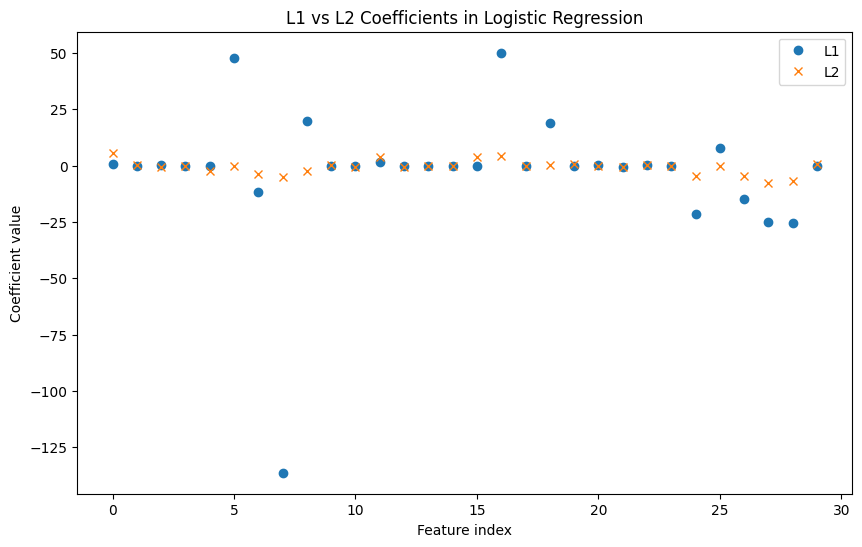

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(logreg_l1.coef_[0], 'o', label='L1')
plt.plot(logreg_l2.coef_[0], 'x', label='L2')
plt.xlabel("Feature index")
plt.ylabel("Coefficient value")
plt.title("L1 vs L2 Coefficients in Logistic Regression")
plt.legend()
plt.show()
